In [116]:
#!pip install mysql-connector-python
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Define your MySQL connection parameters
db_config = {
    'user': 'Glane',
    'password': 'Glane@234',
    'host': '127.0.0.1',  
    'database': 'football'
}

# Connect to the database
conn = mysql.connector.connect(**db_config)

In [117]:
#Define queries
queries = {
    'players': 'SELECT * FROM players',
    'games': 'SELECT * FROM games',
    'appearance': 'SELECT * FROM appearances',
    'lineup': 'SELECT * FROM game_lineups',
    'events': 'SELECT * FROM game_events'
}

# Create a dictionary to store DataFrames
dfs = {}

# Fetch data from each table and store it in a DataFrame
for table, query in queries.items():
    dfs[table] = pd.read_sql(query, conn)

C:\Users\admin\AppData\Local\Temp\ipykernel_14120\2037194353.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table] = pd.read_sql(query, conn)
C:\Users\admin\AppData\Local\Temp\ipykernel_14120\2037194353.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table] = pd.read_sql(query, conn)
C:\Users\admin\AppData\Local\Temp\ipykernel_14120\2037194353.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfs[table] = pd.read_sql(query, conn)
C:\Users\admin\AppData\Local\Temp\ipykernel_14120\2037194353.py:15: UserW

In [118]:
#conn.close()


In [119]:
import numpy as np
# Replace blank values and spaces with NaN in each dataframe in the dictionary 'dfs'
for table, df in dfs.items():
    df.replace('', np.nan, inplace=True)
    df.replace(' ', np.nan, inplace=True)  
    print(f"Blank values in table: {table}")
    print(df.isna().sum(), "\n")

Blank values in table: players
ï»¿player_id                    0
name                            0
last_season                     0
current_club_id                 0
player_code                     0
country_of_birth                0
date_of_birth                   0
sub_position                    0
position                        0
foot                           11
height_in_cm                    3
market_value_in_eur            38
highest_market_value_in_eur     4
contract_expiration_date       46
agent_name                     45
dtype: int64 

Blank values in table: games
ï»¿game_id                   0
competition_id               0
season                       0
round                        0
date                         0
home_club_goals              0
away_club_goals              0
home_club_position         479
away_club_position         479
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 115
referee     

In [120]:
# Rename columns to remove non-ASCII characters in column names
dfs['games'] = dfs['games'].rename(columns={'ï»¿game_id': 'game_id'})
dfs['players'] = dfs['players'].rename(columns={'ï»¿player_id': 'player_id'})
dfs['appearance'] = dfs['appearance'].rename(columns={'ï»¿appearance_id': 'appearance_id'})
dfs['lineup'] = dfs['lineup'].rename(columns={'ï»¿game_lineups_id': 'game_lineups_id'})
dfs['events'] = dfs['events'].rename(columns={'ï»¿game_event_id': 'game_event_id'})

# Merge 'games' and 'appearance' dataframes on common columns
common_columns = list(set(dfs['games'].columns) & set(dfs['appearance'].columns))
merged_df_1 = dfs['games'].merge(dfs['appearance'], on=common_columns, how='left')

# Merge the resulting dataframe with 'players' dataframe on common columns
common_columns = list(set(merged_df_1.columns) & set(dfs['players'].columns))
merged_df_2 = merged_df_1.merge(dfs['players'], on=common_columns, how='left')

# Merge the resulting dataframe with 'events' dataframe on common columns
common_columns = list(set(merged_df_2.columns) & set(dfs['events'].columns))
merged_df_3 = merged_df_2.merge(dfs['events'], on=common_columns, how='left')

# Merge the resulting dataframe with 'lineup' dataframe on common columns
common_columns = list(set(merged_df_3.columns) & set(dfs['lineup'].columns))
final = merged_df_3.merge(dfs['lineup'], on=common_columns, how='left')
final

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,...,agent_name,game_event_id,minute,type,description,player_in_id,player_assist_id,game_lineups_id,number,team_captain
0,2222734,RU1,2012,19. Matchday,07-12-2012,2,3,11.0,10.0,Miodrag Bozovic,...,Prosport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2224572,DK1,2012,3. Matchday,28-07-2012,1,2,12.0,1.0,Jess Thorup,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2224628,DK1,2012,22. Matchday,08-03-2013,2,0,3.0,10.0,Colin Todd,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2224655,DK1,2012,22. Matchday,10-03-2013,0,3,6.0,12.0,Peter Rensen,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2224729,DK1,2012,1. Matchday,15-07-2012,0,1,9.0,5.0,Auri Skarbalius,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,2875216,DK1,2017,19. Matchday,10-12-2017,3,2,3.0,4.0,Kasper Hjulmand,...,Avid Sports Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3718,2875216,DK1,2017,19. Matchday,10-12-2017,3,2,3.0,4.0,Kasper Hjulmand,...,None,237567d50f0a3d2c545dc4776a8321f6,84.0,Substitutions,None,148343,None,NaN,NaN,NaN
3719,3099247,BE1,2018,11. Matchday,20-10-2018,3,1,9.0,7.0,Glen De Boeck,...,CAA Stellar,d3e7898d2f3e2ee405a0caa5e23ad4fb,30.0,Substitutions,None,204347,None,NaN,NaN,NaN
3720,2872273,GB1,2017,16. Matchday,09-12-2017,5,1,6.0,15.0,Mauricio Pochettino,...,CMG Sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
final.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'appearance_id',
       'player_id', 'player_name', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'game_event_id', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id', 'game_lineups_id', 'number', 'team_captain'],
      dtype='object')

In [122]:
# # Define the columns to keep based on the focus areas
# columns_to_keep = [
#     'home_club_goals',
#     'away_club_goals',
#     'season',
#     'date',
#     'player_name',
#     'goals',
#     'assists',
#     'position',
#     'market_value_in_eur',
#     'height_in_cm',
#     'date_of_birth',
#     'home_club_name',
#     'away_club_name',
#     'home_club_position',
#     'away_club_position',
#     'stadium',
#     'attendance',
#     'referee',
#     'yellow_cards',
#     'red_cards',
#     'minute',
#     'type',
#     'competition_type',
#     'contract_expiration_date'
# ]

# # Filter the DataFrame to keep only the relevant columns
# final = final[columns_to_keep]
# final

In [123]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3722 entries, 0 to 3721
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   game_id                      3722 non-null   int64  
 1   competition_id               3722 non-null   object 
 2   season                       3722 non-null   int64  
 3   round                        3722 non-null   object 
 4   date                         3722 non-null   object 
 5   home_club_goals              3722 non-null   int64  
 6   away_club_goals              3722 non-null   int64  
 7   home_club_position           3180 non-null   float64
 8   away_club_position           3180 non-null   float64
 9   home_club_manager_name       3716 non-null   object 
 10  away_club_manager_name       3716 non-null   object 
 11  stadium                      3722 non-null   object 
 12  attendance                   3586 non-null   float64
 13  referee           

In [124]:
#Missing values
final.isna().sum()

game_id                           0
competition_id                    0
season                            0
round                             0
date                              0
home_club_goals                   0
away_club_goals                   0
home_club_position              542
away_club_position              542
home_club_manager_name            6
away_club_manager_name            6
stadium                           0
attendance                      136
referee                           4
home_club_formation            3722
away_club_formation            3722
home_club_name                  126
away_club_name                   66
aggregate                         0
competition_type                  0
appearance_id                     0
player_id                         0
player_name                       0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played              

In [125]:
#Remove columns that have no values at all
final.drop(['home_club_formation','away_club_formation','game_lineups_id','number','team_captain'],axis = 1,inplace = True)

In [126]:
final['contract_expiration_date'].value_counts()

30-06-2024 00:00    529
31-12-2023 00:00    471
30-06-2025 00:00    413
31-12-2024 00:00    330
30-06-2027 00:00    258
31-12-2025 00:00    198
30-06-2028 00:00     60
30-06-2026 00:00     41
30-11-2023 00:00     23
31-05-2026 00:00      6
31-12-2026 00:00      1
Name: contract_expiration_date, dtype: int64

In [127]:
final['referee'].value_counts()

Dr. Felix Brych       75
Felix Zwayer          74
Marco Fritz           71
Manuel Graofe         66
Deniz Aytekin         64
                      ..
Kristinn Jakobsson     1
Alper Ulusoy           1
Manuel Oliveira        1
Cosme Machado          1
Antti Munukka          1
Name: referee, Length: 347, dtype: int64

In [128]:
final['home_club_name'].value_counts()

Borussia Dortmund                              110
Borussia Verein fÃ¼r LeibesÃ¼bung 1900 e.V.    108
FC Schalke 04                                  107
Eintracht Frankfurt Fuayball AG                 99
Stoke City                                      97
                                              ... 
Boavista Futebol Clube                           1
Athlitiki Enosi Konstantinoupoleos               1
Getafe Club  CF -football team dubai             1
De Graafschap Doetinchem                         1
Bologna Football Club 1909                       1
Name: home_club_name, Length: 253, dtype: int64

In [129]:
final['away_club_name'].value_counts()

Borussia Dortmund                            117
FC Schalke 04                                110
eintracht frankfurt Football ag              107
Stoke City                                   105
Borussia Verein fur Leibesubung 1900 e.V.    102
                                            ... 
Villarreal Club de Football S.A.D              1
PFK Stal Kamyanske (-2018)                     1
Elazigspor                                     1
Unione Sportiva Sassuolo Calcio                1
Desportivo Aves (- 2020)                       1
Name: away_club_name, Length: 255, dtype: int64

In [130]:
final['foot'].value_counts()

right    2954
left      480
both      197
Name: foot, dtype: int64

In [131]:
final['agent_name'].value_counts()

Wasserman               541
YMU Group               304
CAA Stellar             227
Robert Schneider        207
ROGON                   178
CMG Sports              175
Mega Sports             128
YMU Management Ltd.      97
PRO FC                   93
Unique Sports Group      86
Promoesport              78
Avid Sports Group        66
Gestifute                66
Football Company Srl     47
PROSPORT Management      47
SBM                      41
OmniSports               40
Joes Blakborn            39
ARP Sportmarketing       37
BS Group - BS Law        28
in4 sports               27
Prosport                 22
acta7                    10
Octagon                   9
TrueSports GmbH           8
FC Enterprise             8
TOP Agency                7
GROW                      5
PG 120 Sport Agency       4
BR Group Management       3
CCC                       3
athleteMNGment            2
Field Management          2
CAA Base Ltd              2
NVA SEG                   1
AKA Global GmbH     

In [132]:
final['description'].value_counts()

, Tactical                                                                             78
, Not reported                                                                         64
1. Yellow card  , Foul                                                                 28
, Right-footed shot, 1. Goal of the Season                                             25
2. Yellow card  , Foul                                                                 20
                                                                                       ..
, Left-footed shot, 14. Goal of the Season Assist:                                      1
, Left-footed shot, 9. Goal of the Season Assist: , Pass, 3. Assist of the Season       1
, Long distance kick, 5. Goal of the Season Assist:                                     1
8. Yellow card  , Foul                                                                  1
, Long distance kick, 7. Goal of the Season Assist: , Pass, 3. Assist of the Season     1
Name: desc

In [133]:
final['player_in_id'].value_counts()

41511     11
90466      9
32711      9
392768     7
102226     6
          ..
122011     1
57372      1
76077      1
99331      1
34838      1
Name: player_in_id, Length: 380, dtype: int64

In [134]:
final['player_assist_id'].value_counts()

36391     7
122421    6
9602      6
25427     6
39381     5
         ..
125250    1
77001     1
15243     1
69646     1
3785      1
Name: player_assist_id, Length: 64, dtype: int64

In [135]:
final['home_club_manager_name'].value_counts()

Mark Hughes          74
Paul Lambert         64
Roberto MartÃ­nez    64
Lucien Favre         61
Dieter Hecking       59
                     ..
Patrick Vieira        1
Yuri Semin            1
Bernard Blaquart      1
Stephane Jobard       1
Luis Freire           1
Name: home_club_manager_name, Length: 580, dtype: int64

In [136]:
final['away_club_manager_name'].value_counts()

Mark Hughes          80
Paul Lambert         73
Lucien Favre         69
Roberto MartÃ­nez    63
Dieter Hecking       59
                     ..
Ian Murray            1
Steve Lovell          1
Raul Procopio         1
Orest Lenczyk         1
Kevin Wilkin          1
Name: away_club_manager_name, Length: 550, dtype: int64

In [137]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Columns with numerical missing values
# Impute missing values

# List of numerical columns to be imputed
num_cols = [
    'market_value_in_eur', 
    'height_in_cm', 
    'home_club_position', 
    'away_club_position', 
    'attendance', 
    'minute'
]

# Imputer for numerical columns with median strategy
imputer_num = SimpleImputer(strategy='median')
final[num_cols] = imputer_num.fit_transform(final[num_cols])

# List of categorical columns to be imputed
cat_cols = [
    'referee', 
    'type',
    'home_club_name',
    'away_club_name',
    'home_club_manager_name',
    'away_club_manager_name',
    'foot',
    'contract_expiration_date',
    'agent_name',
    'game_event_id',
    'description',
    'player_in_id',
    'player_assist_id'
]

# Imputer for categorical columns with most frequent strategy
imputer_cat = SimpleImputer(strategy='most_frequent')
final[cat_cols] = imputer_cat.fit_transform(final[cat_cols])

# Replace specific missing values with default values
# Replace missing values in 'contract_expiration_date' with a default date
final['contract_expiration_date'].replace(pd.NaT, '30-06-2024 00:00', inplace=True)

# Replace missing values in 'referee' with a default referee name
final['referee'].replace(pd.NaT, 'Dr. Felix Brych', inplace=True)

# Replace missing values in 'home_club_name' and 'away_club_name' with 'Borussia Dortmund'
final['home_club_name'].replace(pd.NaT, 'Borussia Dortmund', inplace=True)
final['away_club_name'].replace(pd.NaT, 'Borussia Dortmund', inplace=True)

# Replace missing values in 'foot' with 'right'
final['foot'].replace(pd.NaT, 'right', inplace=True)

# Replace missing values in 'description' with ', Tactical'
final['description'].replace(pd.NaT, ', Tactical', inplace=True)

# Replace missing values in 'player_in_id' with '41511'
final['player_in_id'].replace(pd.NaT, '41511', inplace=True)

# Replace missing values in 'player_assist_id' with '36391'
final['player_assist_id'].replace(pd.NaT, '36391', inplace=True)

# Replace missing values in 'agent_name' with 'Wasserman'
final['agent_name'].replace(pd.NaT, 'Wasserman', inplace=True)

# Replace missing values in 'home_club_manager_name' and 'away_club_manager_name' with 'Mark Hughes'
final['home_club_manager_name'].replace(pd.NaT, 'Mark Hughes', inplace=True)
final['away_club_manager_name'].replace(pd.NaT, 'Mark Hughes', inplace=True)

# Print the final dataframe to verify the imputations
print(final.head())


   game_id competition_id  season         round        date  home_club_goals  \
0  2222734            RU1    2012  19. Matchday  07-12-2012                2   
1  2224572            DK1    2012   3. Matchday  28-07-2012                1   
2  2224628            DK1    2012  22. Matchday  08-03-2013                2   
3  2224655            DK1    2012  22. Matchday  10-03-2013                0   
4  2224729            DK1    2012   1. Matchday  15-07-2012                0   

   away_club_goals  home_club_position  away_club_position  \
0                3                11.0                10.0   
1                2                12.0                 1.0   
2                0                 3.0                10.0   
3                3                 6.0                12.0   
4                1                 9.0                 5.0   

  home_club_manager_name  ... market_value_in_eur highest_market_value_in_eur  \
0        Miodrag Bozovic  ...            800000.0                

In [138]:
final.isna().sum()

game_id                        0
competition_id                 0
season                         0
round                          0
date                           0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
appearance_id                  0
player_id                      0
player_name                    0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
name                           0
last_season                    0
current_club_id                0
player_code                    0
country_of

In [139]:
final.to_csv("Football_data_merged_cleaned.csv")

In [140]:
final.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'appearance_id', 'player_id', 'player_name', 'yellow_cards',
       'red_cards', 'goals', 'assists', 'minutes_played', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name', 'game_event_id', 'minute',
       'type', 'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

### 1. Player Profile and Market Value

#### Market Value Distribution by Position

In [141]:
from tabulate import tabulate
# Generate and print a summary table of market values grouped by position.
print(tabulate(final.groupby('position')['market_value_in_eur'].describe(), headers='keys', tablefmt='pretty'))


+------------+--------+--------------------+--------------------+----------+----------+----------+-----------+------------+
|  position  | count  |        mean        |        std         |   min    |   25%    |   50%    |    75%    |    max     |
+------------+--------+--------------------+--------------------+----------+----------+----------+-----------+------------+
|   Attack   | 1270.0 | 4681062.992125984  | 8410463.250747064  | 150000.0 | 500000.0 | 800000.0 | 900000.0  | 25000000.0 |
|  Defender  | 1074.0 | 1653631.2849162011 | 1975481.3109859577 | 500000.0 | 800000.0 | 800000.0 | 2000000.0 | 13000000.0 |
| Goalkeeper | 418.0  |  699043.062200957  | 741279.6266941035  | 100000.0 | 100000.0 | 800000.0 | 800000.0  | 3500000.0  |
|  Midfield  | 960.0  |     4203906.25     | 7463897.665032687  | 100000.0 | 800000.0 | 800000.0 | 1000000.0 | 25000000.0 |
+------------+--------+--------------------+--------------------+----------+----------+----------+-----------+------------+


Attackers and Midfielders have high average market values (4,681,063 and 4,203,906, respectively) with significant variability, while Defenders and Goalkeepers have lower averages (1,653,631 and 699,043, respectively), with less extreme ranges.

#### Market Value Over Time

C:\Users\admin\AppData\Local\Temp\ipykernel_14120\783607746.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  final['date_of_birth'] = pd.to_datetime(final['date_of_birth'])


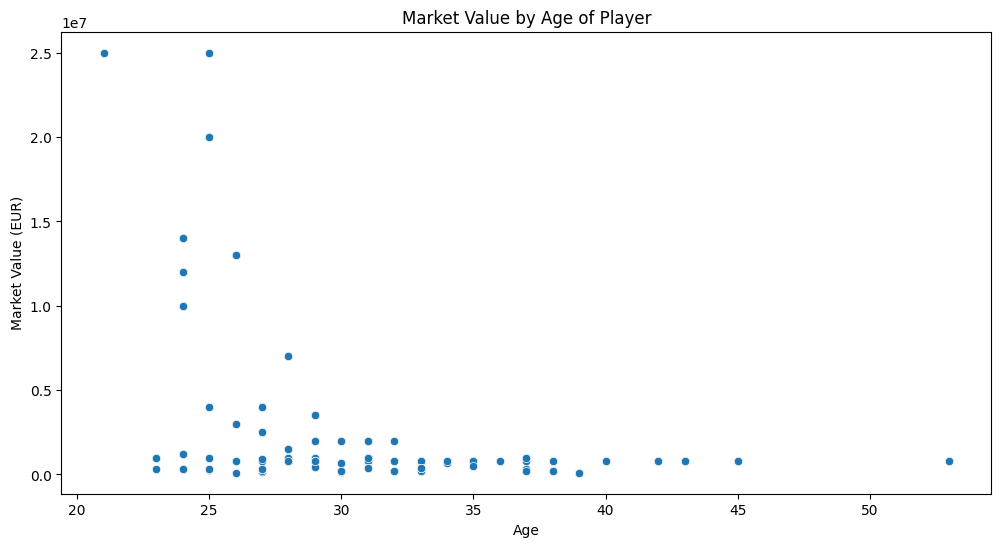

In [142]:
# Plot a scatterplot using seaborn
plt.figure(figsize=(12, 6))
final['date_of_birth'] = pd.to_datetime(final['date_of_birth'])
final['age'] = (pd.to_datetime('today') - final['date_of_birth']).astype('<m8[Y]')
sns.scatterplot(data=final, x='age', y='market_value_in_eur')
plt.title('Market Value by Age of Player')
plt.xlabel('Age')
plt.ylabel('Market Value (EUR)')
plt.show()

The chart shows a clear downward trend in market value as player age increases. The peak market value is around 2.5 million for players in their early 20s, and it steadily declines to near zero for players in their late 40s.

### 2. Team Comparison

#### Home vs. Away Team Goals

In [143]:
# Aggregate and print the total number of goals scored by home and away clubs for each season.
print(tabulate(final.groupby('season').agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum'
}).reset_index(), headers='keys', tablefmt='pretty')) 


+---+--------+-----------------+-----------------+
|   | season | home_club_goals | away_club_goals |
+---+--------+-----------------+-----------------+
| 0 |  2012  |      1132       |       941       |
| 1 |  2013  |       829       |       629       |
| 2 |  2014  |       483       |       379       |
| 3 |  2015  |       556       |       472       |
| 4 |  2016  |       792       |       596       |
| 5 |  2017  |       650       |       514       |
| 6 |  2018  |       818       |       656       |
| 7 |  2019  |       773       |       671       |
| 8 |  2020  |       107       |       87        |
+---+--------+-----------------+-----------------+


Home clubs generally scored more goals than away clubs across seasons, with total ranging from 107 to 1132 goals for home clubs and 87 to 941 goals for away clubs, showing a significant drop in 2020.

#### Average home club Position - top 10

C:\Users\admin\AppData\Local\Temp\ipykernel_14120\367086238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_avg_position, x='Club', y='Average Position', palette='viridis')


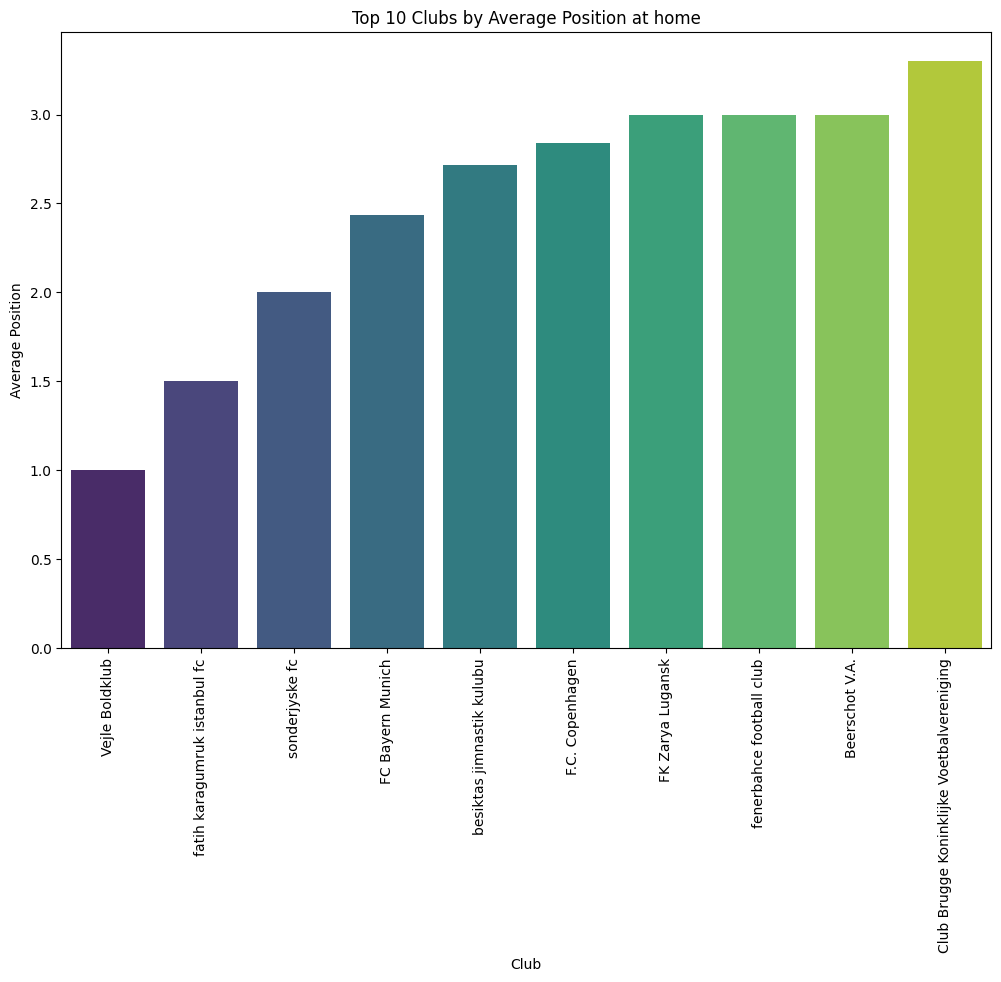

In [144]:
avg_position = final.groupby('home_club_name')['home_club_position'].mean().reset_index()
avg_position.columns = ['Club', 'Average Position']
top_10_avg_position = avg_position.sort_values(by='Average Position').head(10)
plt.figure(figsize=(12, 8))

# Plot a barplot using seaborn
sns.barplot(data=top_10_avg_position, x='Club', y='Average Position', palette='viridis')
plt.title('Top 10 Clubs by Average Position at home')
plt.xlabel('Club')
plt.ylabel('Average Position')
plt.xticks(rotation=90)
plt.show()

Clubs with lower average positions, like Vejle Boldklub and Fatih Karagümrük Istanbul FC, performed exceptionally well at home, while clubs with higher average positions, like Club Brugge, performed less effectively.

### 3. Substitution Patterns

#### Substitution Trends Analysis by season

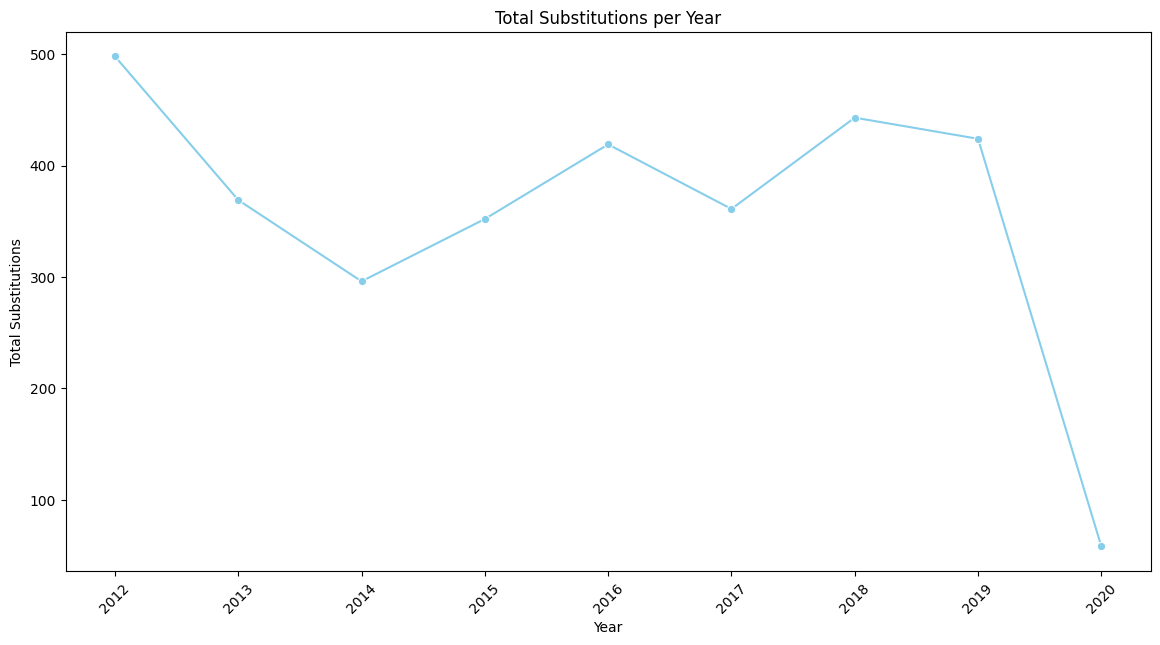

In [145]:
# Filter the data to include only rows where the event type is 'Substitutions'
substitution_data = final[final['type'] == 'Substitutions']

# Group the filtered data by 'season' and count the number of substitutions per year
substitutions_per_year = substitution_data.groupby('season').size().reset_index(name='total_substitutions')

# Set up the figure size for the plot
plt.figure(figsize=(14, 7))

# Create a line plot
sns.lineplot(data=substitutions_per_year, x='season', y='total_substitutions', marker='o', color='skyblue')
plt.title('Total Substitutions per Year')
plt.xlabel('Year')
plt.ylabel('Total Substitutions')
plt.xticks(rotation=45)
plt.show()

Total substitutions peaked in 2012 with 498 and generally ranged between 296 and 443 in subsequent years, but dropped dramatically to 58 in 2020, likely due to disruptions caused by the pandemic.

#### Timing of Substitutions

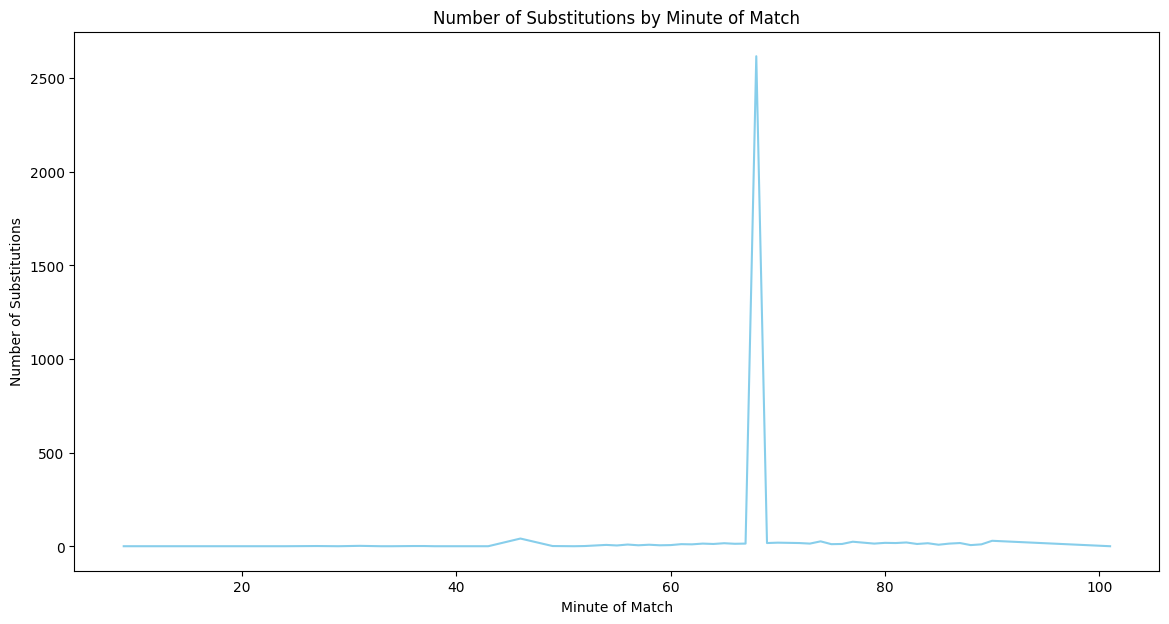

In [146]:
# Filter the data to include only rows where the event type is 'Substitutions'
substitution_data = final[final['type'] == 'Substitutions']

# Group the filtered data by 'minute' and count the number of substitutions for each minute
substitutions_per_minute = substitution_data.groupby('minute').size().reset_index(name='number_of_substitutions')
plt.figure(figsize=(14, 7))
# Create a line plot
sns.lineplot(data=substitutions_per_minute, x='minute', y='number_of_substitutions', color='skyblue')
plt.title('Number of Substitutions by Minute of Match')
plt.xlabel('Minute of Match')
plt.ylabel('Number of Substitutions')
plt.show()

The number of substitutions generally increases from the start of the match, peaks around the 60th minute, and then declines towards the end of the game.

### 4. Player Attributes and Demographics

#### Player Height Distribution

In [147]:
final['height_in_cm'].describe()

count    3722.000000
mean      184.190758
std         6.274997
min       162.000000
25%       180.000000
50%       184.000000
75%       190.000000
max       195.000000
Name: height_in_cm, dtype: float64

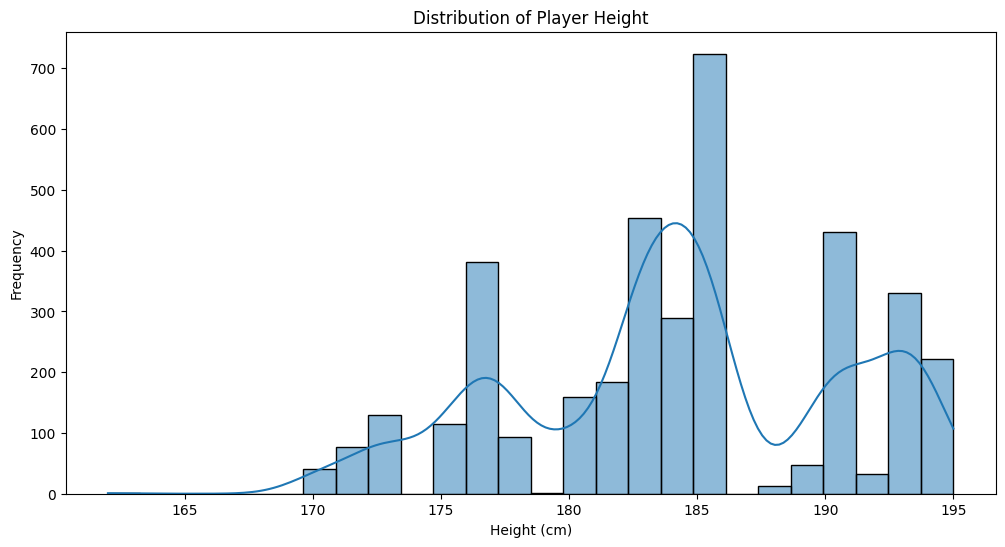

In [148]:
plt.figure(figsize=(12, 6))
#create a histogram
sns.histplot(final['height_in_cm'], kde=True)
plt.title('Distribution of Player Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

The average height of players is 184.19 cm, with most players falling between 180 cm and 190 cm. Heights range from a minimum of 162 cm to a maximum of 195 cm, with a standard deviation of 6.27 cm indicating moderate variability.

#### Player Age Distribution

In [149]:
final['age'].describe()

count    3722.000000
mean       33.144009
std         5.820961
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        53.000000
Name: age, dtype: float64

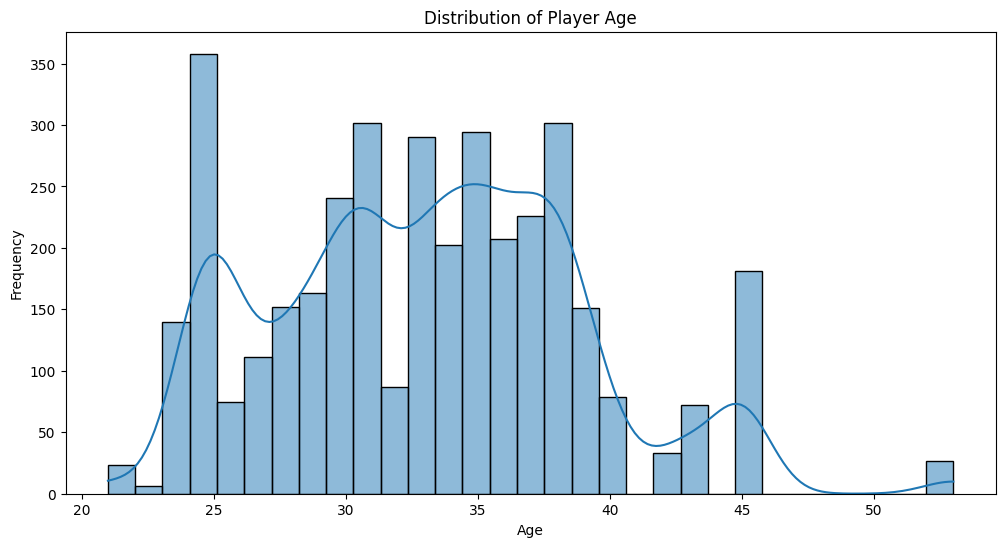

In [150]:
plt.figure(figsize=(12, 6))
#create a histogram
sns.histplot(final['age'], kde=True)
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The average age of players is 33.14 years, with most players between 29 and 37 years old. Ages range from 21 to 53 years, with a standard deviation of 5.83 years indicating moderate variability in player ages.

### 5. Contract Management

#### Contract Expiration Dates Distribution

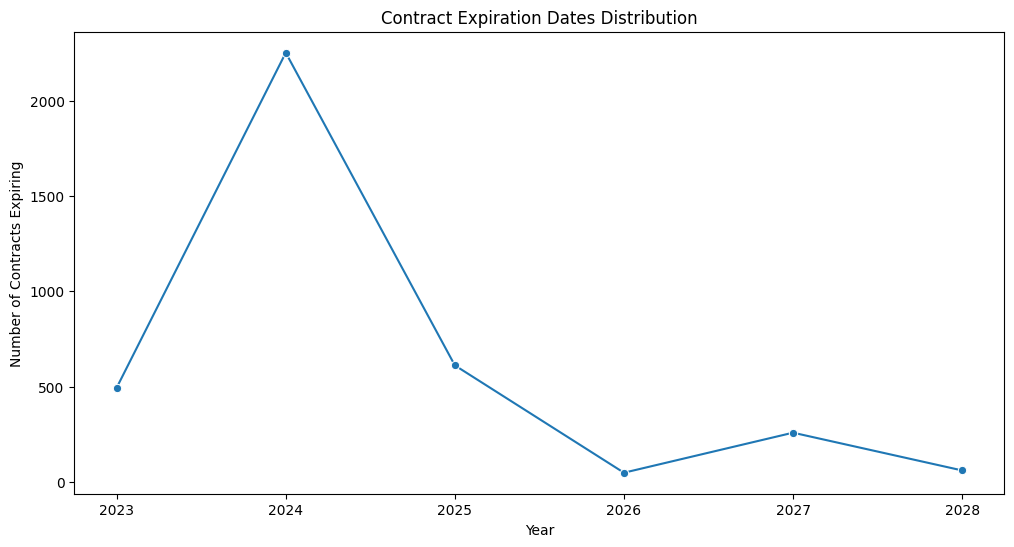

In [151]:
# Convert 'contract_expiration_date' to datetime format
final['contract_expiration_date'] = pd.to_datetime(final['contract_expiration_date'])
# Extract the year from the 'contract_expiration_date' and count the number of occurrences for each year
contract_expiration_count = final['contract_expiration_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
# Create a line plot
sns.lineplot(x=contract_expiration_count.index, y=contract_expiration_count.values, marker='o')
plt.title('Contract Expiration Dates Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Contracts Expiring')
plt.xticks(contract_expiration_count.index)
plt.show()

The plot shows a peak in contract expirations in 2024 with 2,251 contracts, and notably fewer expirations in other years, particularly in 2026.

#### Market Value by Contract Expiration Date

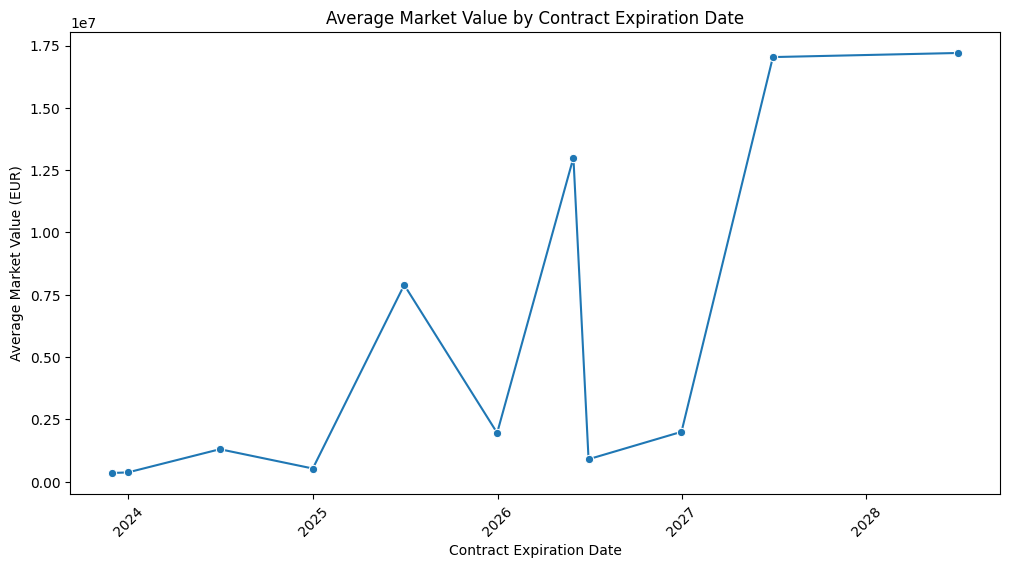

In [152]:
# Group the data by 'contract_expiration_date' and calculate the mean market value for each date
market_value_by_date = final.groupby('contract_expiration_date')['market_value_in_eur'].mean().reset_index()
plt.figure(figsize=(12, 6))
# Create a line plot
sns.lineplot(data=market_value_by_date, x='contract_expiration_date', y='market_value_in_eur', marker='o')
plt.title('Average Market Value by Contract Expiration Date')
plt.xlabel('Contract Expiration Date')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()

A general trend of increasing average market values leading up to 2027 and 2028 is seen, with significant spikes in 2025 and 2026. This indicates higher market values for contracts expiring in the later years, particularly in 2027 and 2028.

### Additional graphs for each

### 1. Player Profile and Market Value

#### Market Value Distribution by Position  

C:\Users\admin\AppData\Local\Temp\ipykernel_14120\1793704266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='position', y='mean', data=summary_table, palette='viridis')


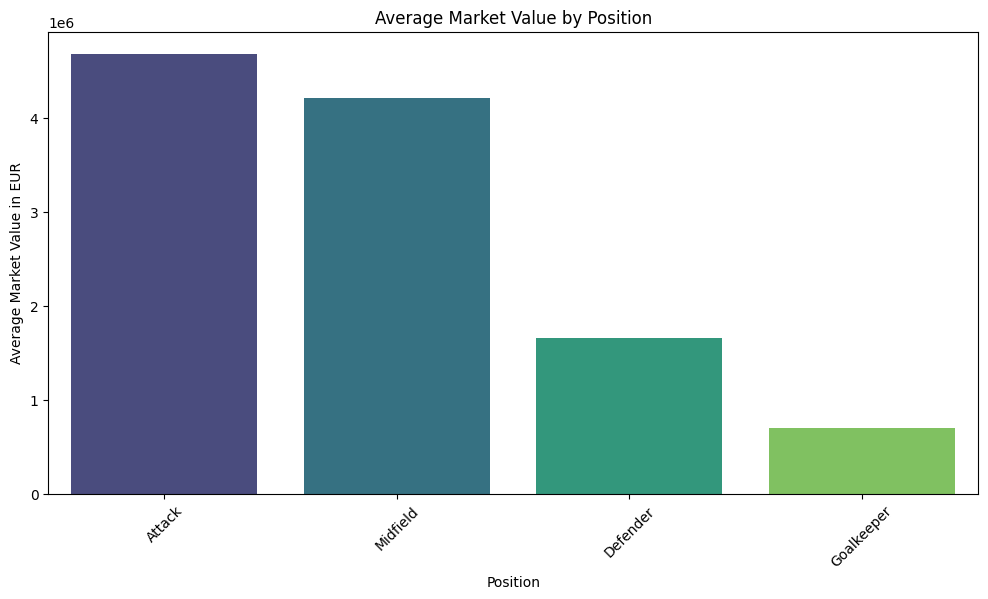

In [153]:
summary_table = final.groupby('position')['market_value_in_eur'].describe()
summary_table = summary_table.reset_index()
summary_table = summary_table.sort_values(by='mean', ascending=False)
plt.figure(figsize=(12, 6))
#bar plot
sns.barplot(x='position', y='mean', data=summary_table, palette='viridis')
plt.title('Average Market Value by Position')
plt.xlabel('Position')
plt.ylabel('Average Market Value in EUR')
plt.xticks(rotation=45)
plt.show()

#### Market Value Over Time

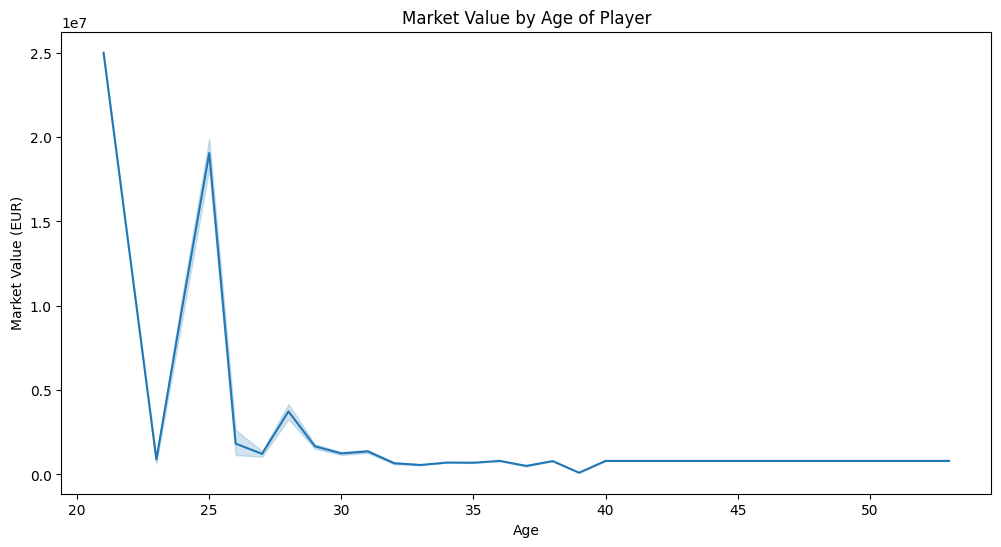

In [154]:
#line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=final, x='age', y='market_value_in_eur')
plt.title('Market Value by Age of Player')
plt.xlabel('Age')
plt.ylabel('Market Value (EUR)')
plt.show()

### 2. Team Comparison

#### Home vs. Away Team Goals


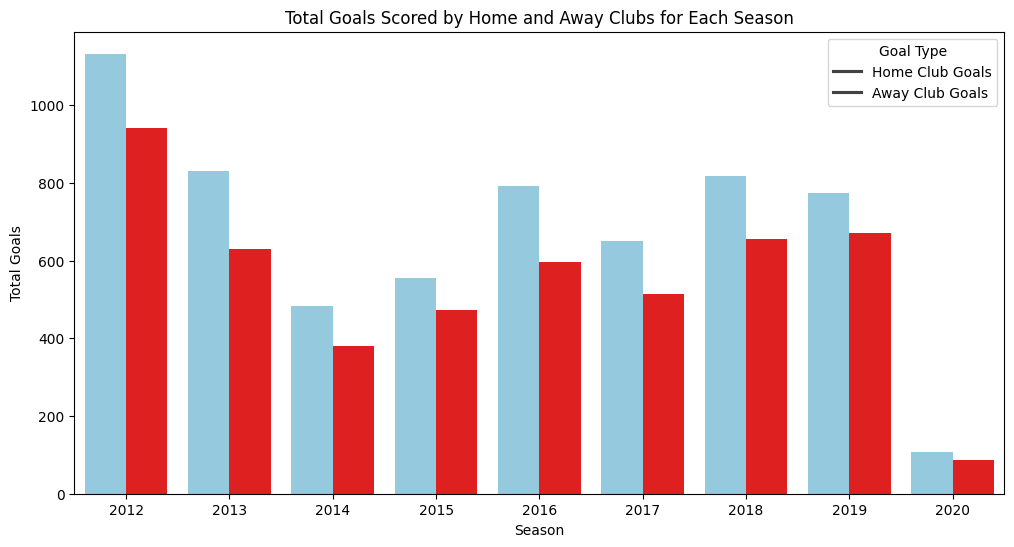

In [155]:
goals_summary = final.groupby('season').agg({
    'home_club_goals': 'sum',
    'away_club_goals': 'sum'
}).reset_index()


# Melt the DataFrame for easier plotting with seaborn
goals_summary_melted = goals_summary.melt(id_vars='season', value_vars=['home_club_goals', 'away_club_goals'], var_name='type', value_name='goals')

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=goals_summary_melted, x='season', y='goals', hue='type',palette={'home_club_goals': 'skyblue', 'away_club_goals': 'red'})
plt.title('Total Goals Scored by Home and Away Clubs for Each Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
plt.legend(title='Goal Type', labels=['Home Club Goals', 'Away Club Goals'])
plt.show()

#### Average home club Position - top 10

C:\Users\admin\AppData\Local\Temp\ipykernel_14120\1799106851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=top_10_avg_position, x='Average Position', y='Club', palette='viridis', size=8)


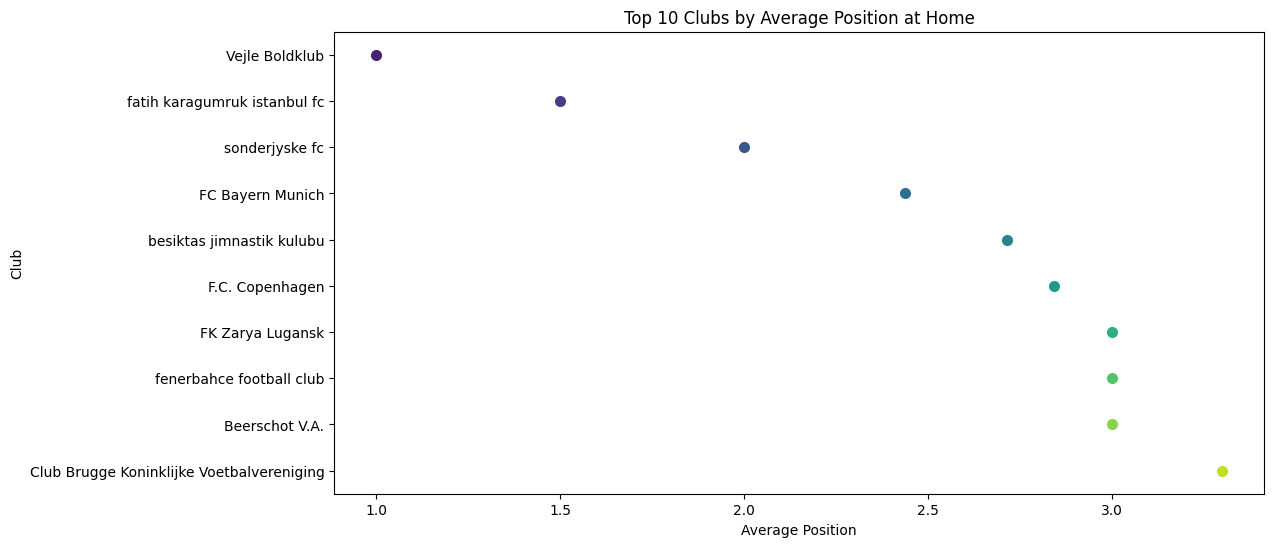

In [156]:
###Swarm Plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=top_10_avg_position, x='Average Position', y='Club', palette='viridis', size=8)
plt.title('Top 10 Clubs by Average Position at Home')
plt.xlabel('Average Position')
plt.ylabel('Club')
plt.show()

### 3. Substitution Patterns

#### Substitution Trends Analysis by season

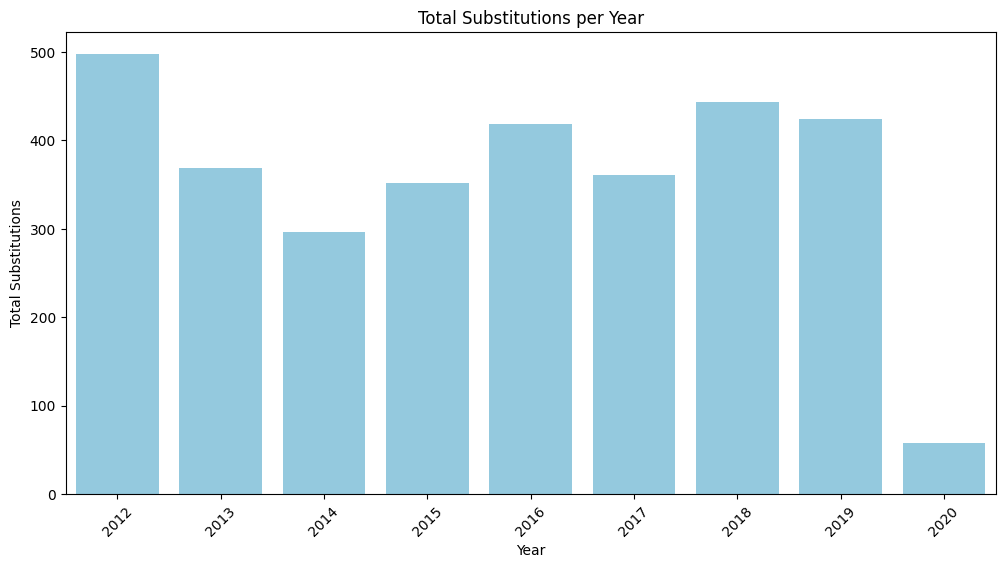

In [157]:
#bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=substitutions_per_year, x='season', y='total_substitutions', color='skyblue')
plt.title('Total Substitutions per Year')
plt.xlabel('Year')
plt.ylabel('Total Substitutions')
plt.xticks(rotation=45)
plt.show()

#### Timing of Substitutions

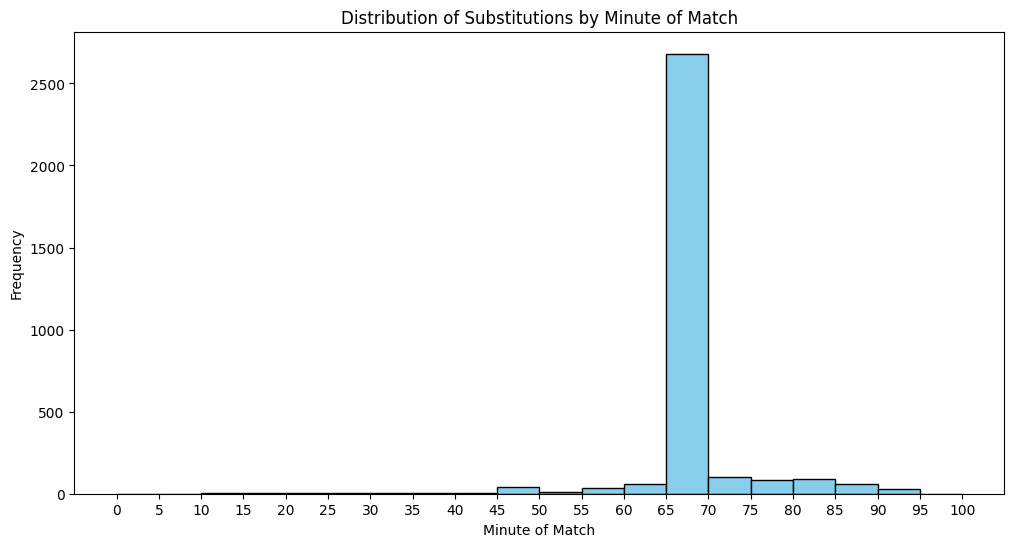

In [158]:
plt.figure(figsize=(12, 6))
plt.hist(substitution_data['minute'], bins=range(0, 101, 5), color='skyblue', edgecolor='black')
plt.title('Distribution of Substitutions by Minute of Match')
plt.xlabel('Minute of Match')
plt.ylabel('Frequency')
plt.xticks(range(0, 101, 5))
plt.show()


### 4. Player Attributes and Demographics

#### Player Height Distribution

In [159]:
height_summary = final['height_in_cm'].describe()
height_summary_df = pd.DataFrame(height_summary).reset_index()
height_summary_df.columns = ['Statistic', 'Value']
# summary statistics in a tabular format
print(tabulate(height_summary_df, headers='keys', tablefmt='pretty'))

+---+-----------+--------------------+
|   | Statistic |       Value        |
+---+-----------+--------------------+
| 0 |   count   |       3722.0       |
| 1 |   mean    | 184.19075765717355 |
| 2 |    std    | 6.274997032849556  |
| 3 |    min    |       162.0        |
| 4 |    25%    |       180.0        |
| 5 |    50%    |       184.0        |
| 6 |    75%    |       190.0        |
| 7 |    max    |       195.0        |
+---+-----------+--------------------+


#### Player Age Distribution

In [160]:
age_summary = final['age'].describe()
age_summary_df = pd.DataFrame(age_summary).reset_index()
age_summary_df.columns = ['Statistic', 'Value']
# summary statistics in a tabular format
print(tabulate(age_summary_df, headers='keys', tablefmt='pretty'))

+---+-----------+-------------------+
|   | Statistic |       Value       |
+---+-----------+-------------------+
| 0 |   count   |      3722.0       |
| 1 |   mean    | 33.14400859752821 |
| 2 |    std    | 5.820960637588048 |
| 3 |    min    |       21.0        |
| 4 |    25%    |       29.0        |
| 5 |    50%    |       33.0        |
| 6 |    75%    |       37.0        |
| 7 |    max    |       53.0        |
+---+-----------+-------------------+


### 5. Contract Management

#### Contract Expiration Dates Distribution

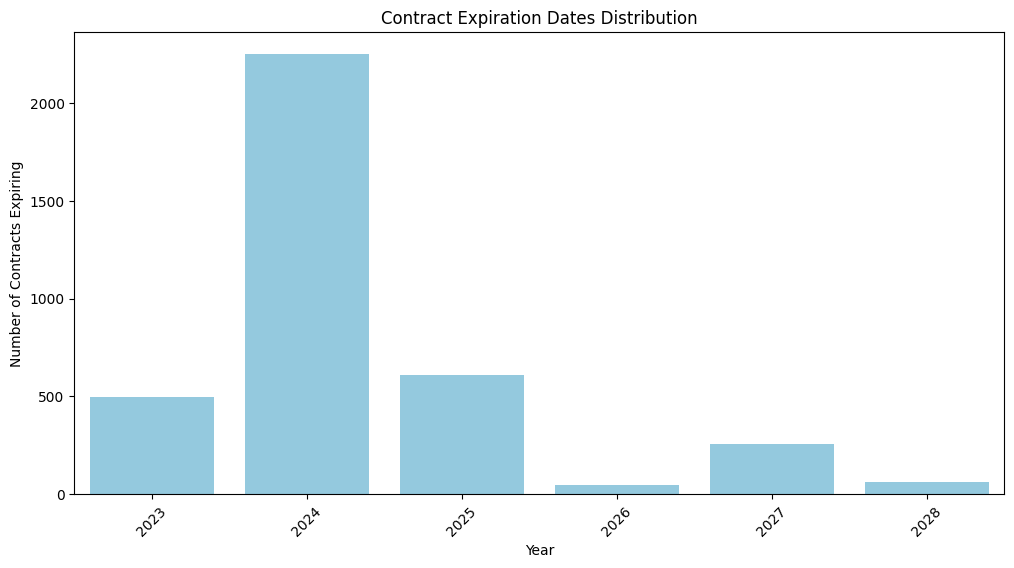

In [161]:
contract_expiration_count = final['contract_expiration_date'].dt.year.value_counts().sort_index()
contract_expiration_df = contract_expiration_count.reset_index()
contract_expiration_df.columns = ['Year', 'Number_of_Contracts']
plt.figure(figsize=(12, 6))
# bar plot
sns.barplot(data=contract_expiration_df, x='Year', y='Number_of_Contracts', color='skyblue')
plt.title('Contract Expiration Dates Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Contracts Expiring')
plt.xticks(rotation=45) 
plt.show()

#### Market Value by Contract Expiration Date

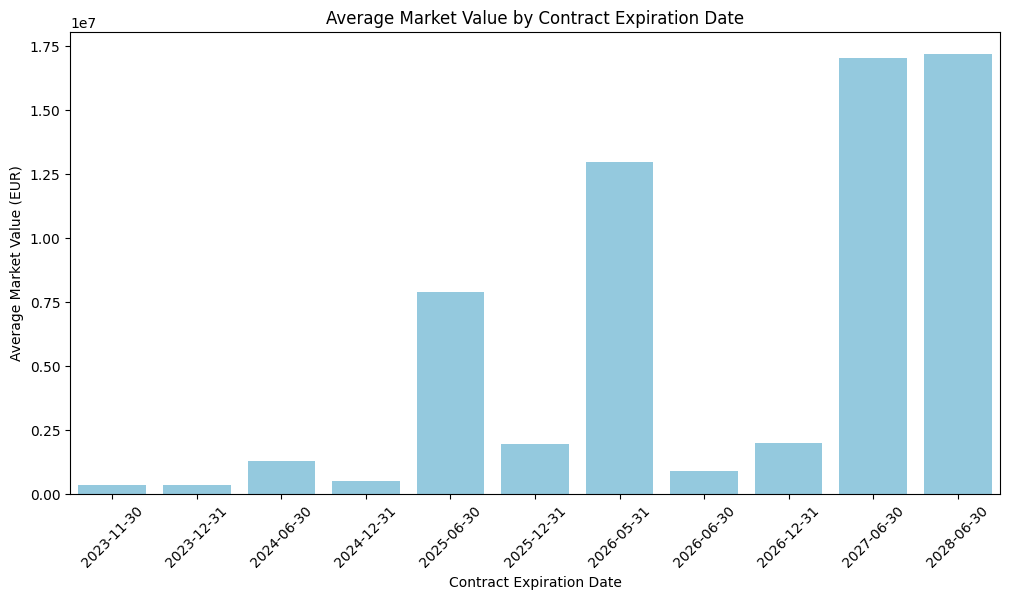

In [162]:
plt.figure(figsize=(12, 6))
sns.barplot(data=market_value_by_date, x='contract_expiration_date', y='market_value_in_eur', color='skyblue')
plt.title('Average Market Value by Contract Expiration Date')
plt.xlabel('Contract Expiration Date')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.show()